In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
pCTR = pd.read_csv('need_download.csv')
validation =pd.read_csv('dataset/validation.csv')
train = pd.read_csv('dataset/train.csv')

In [4]:
pCTR = pCTR.drop(['Index'],axis = 1)

In [5]:
payprice = validation.payprice
click = validation.click

In [6]:
# Average CTR
avgCTR = (train.click.sum() / train.logtype.sum())
avgPays=(train.payprice.sum()/len(train.payprice))
maxPays = max(train.payprice)
avgBidss=(train.bidprice.sum()/len(train.bidprice))
maxBidss = max(train.bidprice)

In [140]:
def powerbid(base,power):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    bid = base*(pCTR.pCTR/avgCTR)**power
    bool_check = bid >= payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
                if cost >= budget:
                    break
    print('impression:',impression)
    print('clicks:',clicks)
    print('cost:',cost)
    return [impression, clicks, cost]

In [127]:
def logbid(base):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    bid = base*np.log2((pCTR.pCTR/avgCTR))
    bool_check = bid >= payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
                if cost >= budget:
                    break
    print('impression:',impression)
    print('clicks:',clicks)
    print('cost:',cost)
    return [impression, clicks, cost]

In [128]:
logbid(40)

impression: 88148.0
clicks: 86
cost: 5038594.0


[88148.0, 86, 5038594.0]

In [129]:
logbid(50)

impression: 97785.0
clicks: 94
cost: 5672556.0


[97785.0, 94, 5672556.0]

In [130]:
logbid(60)

impression: 105584.0
clicks: 102
cost: 6250032.0


[105584.0, 102, 6250032.0]

In [131]:
logbid(90)

impression: 99663.0
clicks: 106
cost: 6250110.0


[99663.0, 106, 6250110.0]

In [133]:
logbid(80)

impression: 101412.0
clicks: 105
cost: 6250002.0


[101412.0, 105, 6250002.0]

In [135]:
g = logbid(90)
CTR = (g[1]/g[0] * 100).round(2).astype(str)
CPM = (g[2]/ g[0]* 100).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 99663.0
clicks: 106
cost: 6250110.0
CTR: 0.11
CPM: 6271.24
CPC: 58963.3


In [7]:
powerbid(2,200)


impression: 77376.0
clicks: 75
cost: 6250004.0


[77376.0, 75, 6250004.0]

In [8]:
minBidss = min(train.bidprice)

In [9]:
base_bid= np.arange(80,340,20)
powpara = np.arange(0.5,4,0.5)
print(len(base_bid))
print(len(powpara))

13
7


In [10]:
g = powerbid(200,2)

impression: 83038.0
clicks: 70
cost: 6250028.0


In [11]:
len(range(1,91))

90

In [14]:
base_bid= np.arange(20,321,50)
powpara = np.arange(0.5,2.5,0.5)
bid_pow = pd.DataFrame()
im = np.ones(49)
clks = np.zeros(49)
ct = np.zeros(49)

for i in range(0,49):
    for base in base_bid:
        for power in powpara: 
            print('base:',base,'power:',power)
            g = powerbid(base,power)
            im[i]=g[0]
            clks[i] = g[1]
            ct[i]=g[2]
            
# ortb['CTR'] = (ortb.clicks/ortb.imps_won * 100).round(4).astype(str)
# ortb['CPM'] = (ortb.total_spend/ortb.imps_won * 1000).round(2).astype(str)
# ortb['CPC'] = (ortb.total_spend/ortb.clicks).round(2).astype(str)
            
            
            
            
            
            

base: 20 power: 0.5
impression: 91880.0
clicks: 71
cost: 4621646.0
base: 20 power: 1.0
impression: 103713.0
clicks: 94
cost: 5377187.0
base: 20 power: 1.5
impression: 109443.0
clicks: 99
cost: 6250004.0
base: 20 power: 2.0
impression: 99079.0
clicks: 100
cost: 6250086.0
base: 70 power: 0.5
impression: 115302.0
clicks: 94
cost: 6250049.0
base: 70 power: 1.0
impression: 103363.0
clicks: 87
cost: 6250049.0
base: 70 power: 1.5
impression: 97134.0
clicks: 83
cost: 6250018.0
base: 70 power: 2.0
impression: 93640.0
clicks: 83
cost: 6250224.0
base: 120 power: 0.5
impression: 98590.0
clicks: 86
cost: 6250132.0
base: 120 power: 1.0
impression: 92651.0
clicks: 80
cost: 6250076.0
base: 120 power: 1.5
impression: 89669.0
clicks: 79
cost: 6250028.0
base: 120 power: 2.0
impression: 88017.0
clicks: 76
cost: 6250069.0
base: 170 power: 0.5
impression: 89237.0
clicks: 75
cost: 6250008.0
base: 170 power: 1.0
impression: 86839.0
clicks: 74
cost: 6250072.0
base: 170 power: 1.5
impression: 85432.0
clicks: 74

KeyboardInterrupt: 

In [15]:
clks

array([ 70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,
        70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  86.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [24]:
g = powerbid(80,0.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 111312.0
clicks: 90
cost: 6250017.0
CTR: 0.81
CPM: 56148.64
CPC: 69444.63


In [25]:
g = powerbid(40,0.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 134950.0
clicks: 97
cost: 6250005.0
CTR: 0.72
CPM: 46313.49
CPC: 64433.04


In [26]:
g = powerbid(20,0.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 91880.0
clicks: 71
cost: 4621646.0
CTR: 0.77
CPM: 50300.89
CPC: 65093.61


In [27]:
g = powerbid(160,0.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 90691.0
clicks: 78
cost: 6250016.0
CTR: 0.86
CPM: 68915.5
CPC: 80128.41


In [28]:
g = powerbid(80,2)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 92207.0
clicks: 83
cost: 6250015.0
CTR: 0.9
CPM: 67782.44
CPC: 75301.39


In [29]:
g = powerbid(40,2)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 97797.0
clicks: 92
cost: 6250160.0
CTR: 0.94
CPM: 63909.53
CPC: 67936.52


In [31]:
g = powerbid(20,2)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 99079.0
clicks: 100
cost: 6250086.0
CTR: 1.01
CPM: 63081.84
CPC: 62500.86


In [32]:
g = powerbid(160,2)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 85027.0
clicks: 73
cost: 6250044.0
CTR: 0.86
CPM: 73506.58
CPC: 85617.04


In [33]:
g = powerbid(20,1.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 109443.0
clicks: 99
cost: 6250004.0
CTR: 0.9
CPM: 57107.39
CPC: 63131.35


In [34]:
g = powerbid(40,1.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 103214.0
clicks: 97
cost: 6250019.0
CTR: 0.94
CPM: 60553.98
CPC: 64433.19


In [35]:
g = powerbid(80,1.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 95459.0
clicks: 83
cost: 6250239.0
CTR: 0.87
CPM: 65475.64
CPC: 75304.08


In [36]:
g = powerbid(160,1.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 86179.0
clicks: 73
cost: 6250205.0
CTR: 0.85
CPM: 72525.85
CPC: 85619.25


In [37]:
g = powerbid(20,3)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 91740.0
clicks: 95
cost: 6250004.0
CTR: 1.04
CPM: 68127.36
CPC: 65789.52


In [38]:
g = powerbid(40,3)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 92050.0
clicks: 86
cost: 6250018.0
CTR: 0.93
CPM: 67898.08
CPC: 72674.63


In [39]:
g = powerbid(80,3)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 88797.0
clicks: 78
cost: 6250167.0
CTR: 0.88
CPM: 70387.14
CPC: 80130.35


In [40]:
g = powerbid(160,3)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 83440.0
clicks: 73
cost: 6250034.0
CTR: 0.87
CPM: 74904.53
CPC: 85616.9


In [41]:
g = powerbid(20,1)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 103713.0
clicks: 94
cost: 5377187.0
CTR: 0.91
CPM: 51846.8
CPC: 57204.12


In [42]:
g = powerbid(40,1)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 115947.0
clicks: 103
cost: 6250008.0
CTR: 0.89
CPM: 53904.01
CPC: 60679.69


In [43]:
g = powerbid(80,1)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 100433.0
clicks: 84
cost: 6250000.0
CTR: 0.84
CPM: 62230.54
CPC: 74404.76


In [44]:
g = powerbid(160,1)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 87791.0
clicks: 74
cost: 6250080.0
CTR: 0.84
CPM: 71192.72
CPC: 84460.54


In [48]:
g = powerbid(20,2.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 94459.0
clicks: 101
cost: 6250017.0
CTR: 1.07
CPM: 66166.45
CPC: 61881.36


In [49]:
g = powerbid(40,2.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 94279.0
clicks: 89
cost: 6250007.0
CTR: 0.94
CPM: 66292.67
CPC: 70224.8


In [50]:
g = powerbid(80,2.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 90086.0
clicks: 79
cost: 6250003.0
CTR: 0.88
CPM: 69378.18
CPC: 79113.96


In [51]:
g = powerbid(160,2.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 84066.0
clicks: 73
cost: 6250060.0
CTR: 0.87
CPM: 74347.06
CPC: 85617.26


In [139]:
g = powerbid(50,1.5,1)
CTR = (g[1]/g[0] * 100).round(2).astype(str)
CPM = (g[2]/ g[0]* 100).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 100866.0
clicks: 91
cost: 6250121.0
CTR: 0.09
CPM: 6196.46
CPC: 68682.65


In [113]:
power = [0.5,1,1.5,2,2.5,3]
click = [97,103,97,92,89,86]
ctr = [0.072,0.089,0.094,0.094,0.094,0.093]
imp = [134950,115947,103214,97797,94279,92050]
cpc = [64433,60680,64433,67936.53,70225,72675]

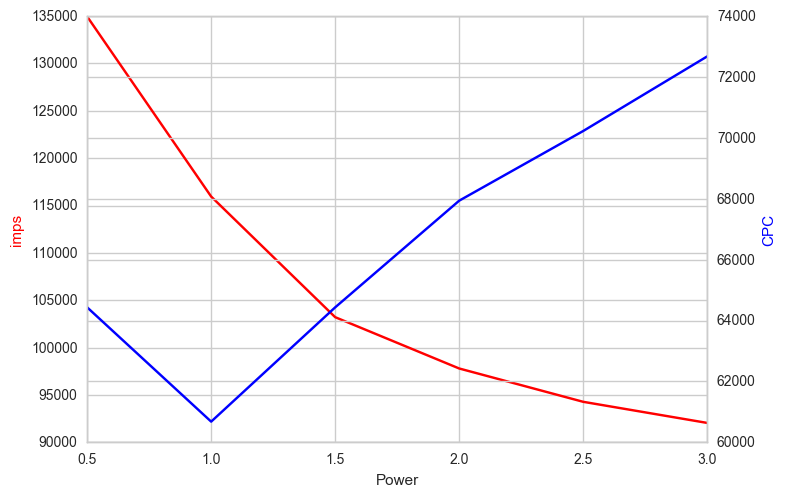

In [114]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(power, imp, 'r-')
ax2.plot(power, cpc, 'b-')

ax1.set_xlabel('Power')
ax1.set_ylabel('imps', color='r')
ax2.set_ylabel('CPC', color='b')

plt.show()

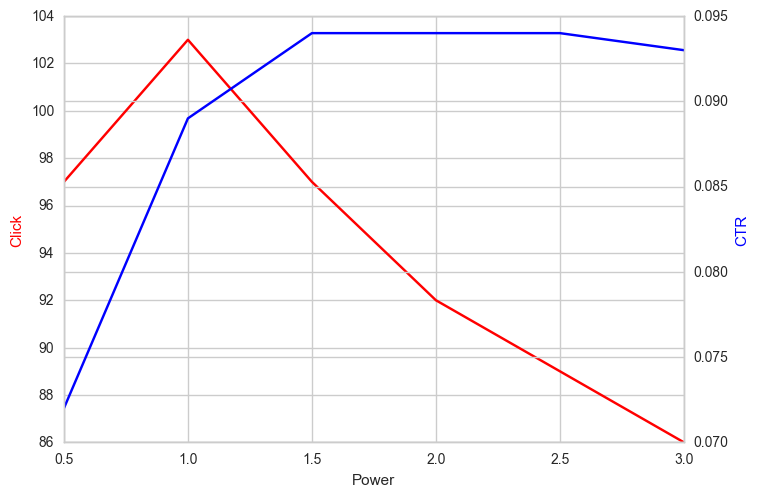

In [115]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(power, click, 'r-')
ax2.plot(power, ctr, 'b-')

ax1.set_xlabel('Power')
ax1.set_ylabel('Click', color='r')
ax2.set_ylabel('CTR', color='b')

plt.show()

In [102]:
def powerbid2(base,power,bud):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000*bud
    bid = base*(pCTR.pCTR/avgCTR)**power
    bool_check = bid >= payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
                if cost >= budget:
                    break
    print('impression:',impression)
    print('clicks:',clicks)
    print('cost:',cost)
    return [impression, clicks, cost]

In [150]:
g = powerbid(25,1.5)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 109820.0
clicks: 100
cost: 6250025.0
CTR: 0.91
CPM: 56911.54
CPC: 62500.25


In [104]:
g = powerbid2(40,1.5,1/2)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 51641.0
clicks: 56
cost: 3125013.0
CTR: 1.08
CPM: 60514.18
CPC: 55803.8


In [105]:
g = powerbid2(40,1.5,1/4)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 25558.0
clicks: 31
cost: 1562508.0
CTR: 1.21
CPM: 61135.77
CPC: 50403.48


In [106]:
g = powerbid2(40,1.5,1/8)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 12785.0
clicks: 16
cost: 781253.0
CTR: 1.25
CPM: 61107.0
CPC: 48828.31


In [107]:
g = powerbid2(40,1.5,1/16)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 6409.0
clicks: 9
cost: 390627.0
CTR: 1.4
CPM: 60949.76
CPC: 43403.0


In [108]:
g = powerbid2(40,1.5,1/32)
CTR = (g[1]/g[0] * 1000).round(2).astype(str)
CPM = (g[2]/ g[0]* 1000).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 3189.0
clicks: 5
cost: 195340.0
CTR: 1.57
CPM: 61254.31
CPC: 39068.0


In [109]:
budget = [1/32,1/16,1/8,1/4,1/2]
clt2 = [4/9,(31-9)/31,(31-16)/31,(56-31)/56,(97-56/97)]
ctr2 = [(1.57-1.4)/1.4,(1.4-1.25)/1.25,(1.25-1.21)/1.21,(1.21-1.08)/1.08,(1.08-0.94)/0.94]
imps = [(6409-3189)/6409,(12785-6409)/12785,(25558-12785)/25558,(51641-25558)/51641,(103214-51641)/103214]
cpc = [(43403-39068)/43403,(48828-43403)/48828,(50403-43403)/50403,(55804-50403)/55840,(64433-55840)/64433]

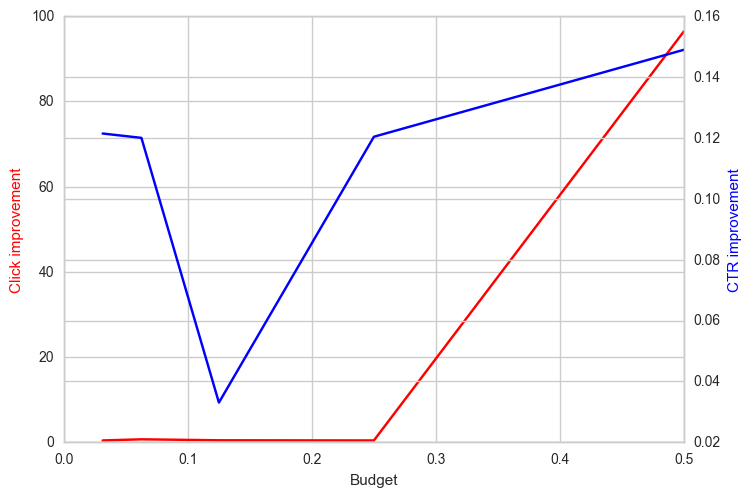

In [110]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(budget, clt2, 'r-')
ax2.plot(budget, ctr2, 'b-')

ax1.set_xlabel('Budget')
ax1.set_ylabel('Click improvement', color='r')
ax2.set_ylabel('CTR improvement', color='b')

plt.show()

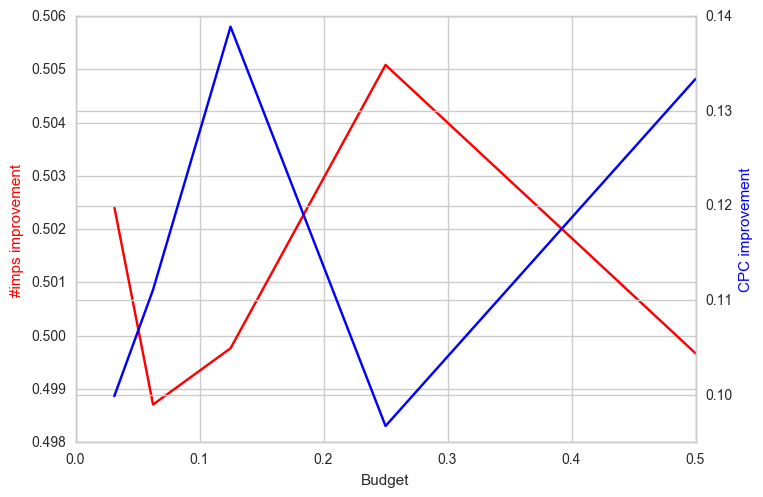

In [111]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(budget, imps, 'r-')
ax2.plot(budget, cpc, 'b-')

ax1.set_xlabel('Budget')
ax1.set_ylabel('#imps improvement', color='r')
ax2.set_ylabel('CPC improvement', color='b')

plt.show()

In [88]:
import math


In [92]:
def logbid(base,power):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    pCTR.pCTR = pd.to_numeric(pCTR.pCTR)
    bid = base*math.log((pCTR.pCTR/avgCTR),power)
    bool_check = bid >= payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
                if cost >= budget:
                    break
    print('impression:',impression)
    print('clicks:',clicks)
    print('cost:',cost)
    return [impression, clicks, cost]

In [94]:
pCTR.pCTR = pd.to_numeric(pCTR.pCTR)
#bid = 20*math.log((pCTR.pCTR/avgCTR),2)

In [3]:
ana = pd.read_csv('compare.csv')

In [5]:
name = ['strategy','imps_win','total_spend','clicks','CTR','CPM','CPC']
ana.columns=name

In [6]:
ana.clicks = ana.clicks.astype(float)
ana.CTR = ana.CTR.astype(float)
ana.imps_win = ana.imps_win.astype(float)
ana.CPC = ana.CPC.astype(float)

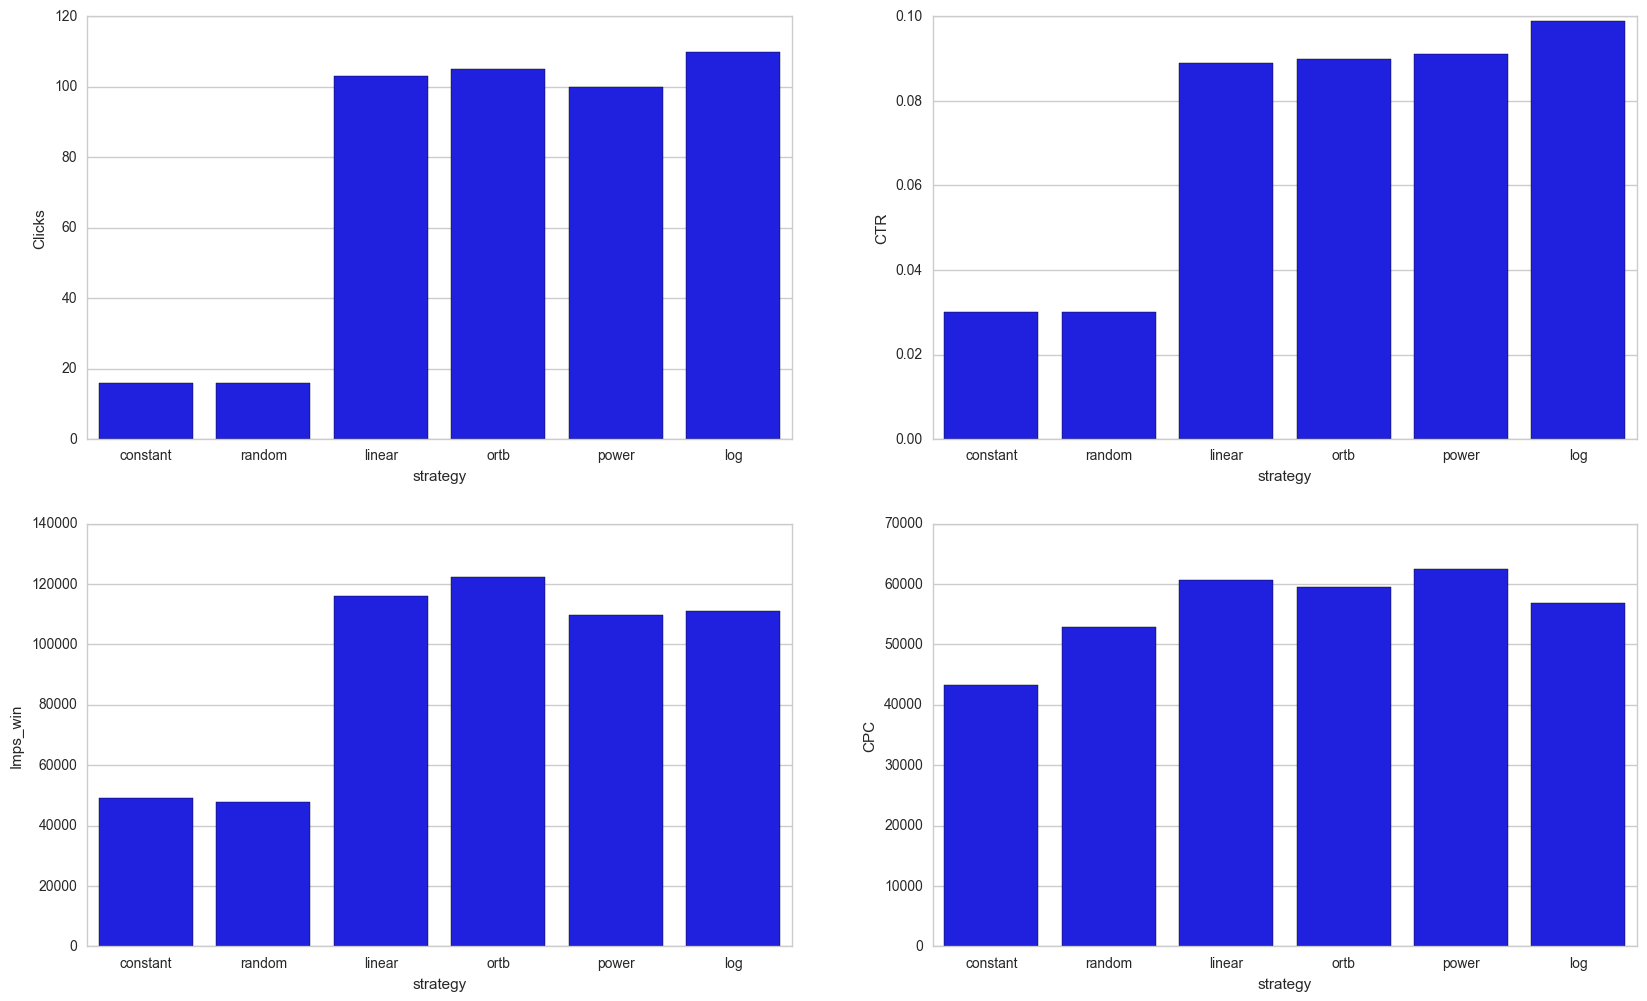

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax1 = sns.barplot(x='strategy', y='clicks', data=ana,color = 'b')
plt.ylabel('Clicks')
plt.subplot(2,2,2)
ax2 = sns.barplot(x='strategy', y='CTR', data=ana,color = 'b')
plt.ylabel('CTR')
plt.subplot(2,2,3)
ax1 = sns.barplot(x='strategy', y='imps_win', data=ana,color = 'b')
plt.ylabel('Imps_win')
plt.subplot(2,2,4)
ax2 = sns.barplot(x='strategy', y='CPC', data=ana,color = 'b')
plt.ylabel('CPC')

In [66]:
def avgbid(base,power):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    pCTR.pCTR = pd.to_numeric(pCTR.pCTR)
    bid1 = base*np.log2((pCTR.pCTR/avgCTR))
    bid2 = np.sqrt((41/5e-06)*pCTR.pCTR+41*41) -41
    bid3 = base*(pCTR.pCTR/avgCTR)**power
    bid = (0.6*bid1+0.1*bid2+0.4*bid3)
#     thrd_check = bid > 400
#     for i in range(0,len(thrd_check)):
#             if thrd_check[i]==True:
#                 bid[i] = 400
    thrd_check2 = bid < 50
    for i in range(0,len(thrd_check2)):
            if thrd_check2[i]==True:
                bid[i] = 50            
    bool_check = bid >= payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
                if cost >= budget:
                    break
    print('impression:',impression)
    print('clicks:',clicks)
    print('cost:',cost)
    return [impression, clicks, cost,bid]

In [67]:
g = avgbid(40,1.5)
CTR = (g[1]/g[0] * 100).round(2).astype(str)
CPM = (g[2]/ g[0]* 100).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)


impression: 118959.0
clicks: 96
cost: 6250049.0
CTR: 0.08
CPM: 5253.95
CPC: 65104.68


In [35]:
g[3]

0          31.876402
1         187.557047
2         107.440497
3          43.007498
4          35.198985
5          26.938277
6          12.693289
7          27.049864
8          65.853211
9         300.000000
10         74.157122
11         70.279453
12        300.000000
13        300.000000
14        224.794220
15         32.661151
16         38.798442
17        300.000000
18        300.000000
19        300.000000
20       -123.872372
21         32.714372
22         40.613257
23         25.701027
24        300.000000
25         12.218828
26         32.537233
27        300.000000
28         83.682457
29         29.365151
             ...    
299719    104.835850
299720     29.246168
299721     37.963089
299722    300.000000
299723    300.000000
299724     30.427492
299725    117.663676
299726    212.744066
299727   -351.395580
299728    137.590868
299729    300.000000
299730    300.000000
299731     95.839298
299732     52.248259
299733    300.000000
299734    300.000000
299735     35

In [40]:
test = pd.read_csv('CTR_test.csv')

In [41]:
test=test['CTR']

In [42]:
test = pd.Series.to_frame(test)

In [43]:
name = ['CTR']
test.columns=name

In [44]:
test

,CTR
0,0.001496
1,0.475646
2,0.000767
3,0.000733
4,0.001335
5,0.000397
6,0.000919
7,0.000177
8,0.512174
9,0.000924


In [45]:
def avgbid(base,power):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    test.CTR = pd.to_numeric(test.CTR)
    bid1 = base*np.log2((test.CTR/avgCTR))
    bid2 = np.sqrt((41/5e-06)*test.CTR+41*41) -41
    bid3 = base*(test.CTR/avgCTR)**power
    bid = (0.5*bid1+0.2*bid2+0.3*bid3)
#  = bid > 300
#     for i in range(0,len(thrd_check)):
#             if thrd_check[i]==True:
#                 bid[i] = 300   thrd_chec
    bool_check = bid >= payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
                if cost >= budget:
                    break
    print('impression:',impression)
    print('clicks:',clicks)
    print('cost:',cost)
    return [impression, clicks, cost,bid]

In [46]:
g = avgbid(40,1.5)
CTR = (g[1]/g[0] * 100).round(2).astype(str)
CPM = (g[2]/ g[0]* 100).round(2).astype(str)
CPC = (g[2]/g[1]).round(2).astype(str)
print('CTR:',CTR)
print('CPM:',CPM)
print('CPC:',CPC)

impression: 105907.0
clicks: 71
cost: 6250225.0
CTR: 0.07
CPM: 5901.62
CPC: 88031.34


In [48]:
bid = g[3].round(2)

In [49]:
bid = pd.Series.to_frame(bid)

In [50]:
bid.columns = ['bid']

In [51]:
bid.to_csv('bids.csv', sep='\t')


In [52]:
bid

,bid
0,68.74
1,300.00
2,22.49
3,20.02
4,59.05
5,-8.02
6,32.88
7,-37.51
8,300.00
9,33.21
